# Descripción del proyecto

Este proyecto tiene el propósito de maximizar los ingresos de nuestra tienda online mediante un análisis detallado de diversas hipótesis de mejora. En colaboración con el departamento de marketing, hemos recopilado un conjunto de hipótesis que se enfocan en optimizar la experiencia del usuario y las estrategias de conversión.

La primera parte del proyecto se centrará en la priorización de estas hipótesis utilizando los marcos de trabajo ICE (Impacto, Confianza, Esfuerzo) y RICE (Alcance, Impacto, Confianza, Esfuerzo). A través de este proceso, clasificaremos las hipótesis según su potencial para influir en los ingresos y el esfuerzo requerido para implementarlas.

En la segunda parte, realizaremos un análisis del test A/B para evaluar el rendimiento de cada hipótesis a través de datos de transacciones y visitas. Esto incluirá la comparación de métricas clave como ingresos acumulados, tamaño promedio de pedido y tasas de conversión. También aplicaremos métodos estadísticos para determinar la significancia de las diferencias observadas, lo que nos permitirá tomar decisiones informadas sobre la efectividad de las hipótesis probadas.

El objetivo final de este proyecto es no solo incrementar los ingresos, sino también sentar las bases para futuras estrategias de marketing y desarrollo, mejorando así la experiencia general del cliente en nuestra tienda online.

# Parte 1. Priorizar hipótesis

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

In [2]:
#Cargar el archivo de hipótesis
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
#Verificar que se haya cargado correctamente
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#Verificar información general
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Calcular el ICE
hipotesis['ICE'] = hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort']

In [6]:
#Mostrar los resultados del ICE de forma descendente
hipotesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [7]:
#Calular el RICE
hipotesis['RICE'] = hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence'] / hipotesis['Effort']

In [8]:
#Mostrar los resultados del RICE de forma descendente
hipotesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


**Cambio en la priorización de hipótesis cuando se utiliza RICE en lugar de ICE.**

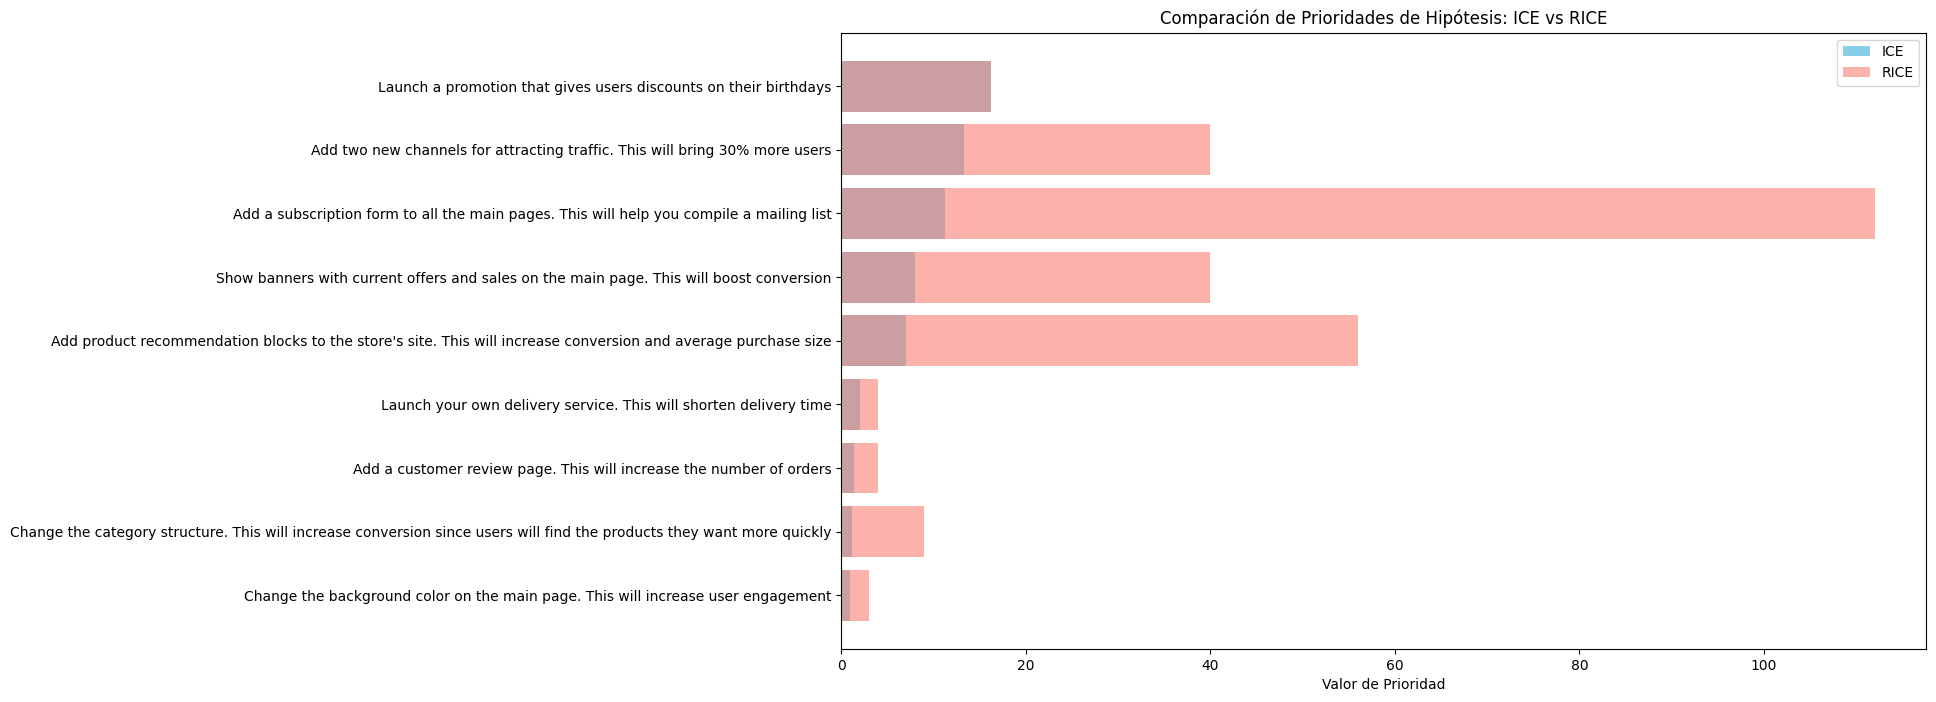

In [9]:
#Ordenar las hipótesis por valores de ICE y RICE para observar la priorización
hipotesis_ice_sorted = hipotesis.sort_values(by='ICE', ascending=False)
hipotesis_rice_sorted = hipotesis.sort_values(by='RICE', ascending=False)

#Crear un gráfico de barras para comparar ICE y RICE
plt.figure(figsize=(14, 8))

#Graficar valores ICE
plt.barh(hipotesis_ice_sorted['Hypothesis'], hipotesis_ice_sorted['ICE'], color='skyblue', label='ICE')

#Graficar valores RICE
plt.barh(hipotesis_rice_sorted['Hypothesis'], hipotesis_rice_sorted['RICE'], color='salmon', alpha=0.6, label='RICE')

#Personalización del gráfico
plt.xlabel('Valor de Prioridad')
plt.title('Comparación de Prioridades de Hipótesis: ICE vs RICE')
plt.legend()
plt.gca().invert_yaxis()  # Invertir eje para mostrar la mayor prioridad arriba

plt.show()

Al comparar los resultados de priorización de hipótesis entre los frameworks ICE y RICE, se observa un cambio significativo en la clasificación de algunas hipótesis. En particular, al aplicar RICE, las hipótesis que tienen un alto valor de alcance (Reach) ganan más peso en la priorización, debido a que este framework toma en cuenta no solo el impacto y la facilidad de implementación, sino también el alcance potencial.

Por ejemplo, la hipótesis "Add a subscription form to all the main pages. This will help you compile a mailing list" tiene una posición más alta en el ranking con RICE en comparación con ICE. Esto se debe a que su alcance es mucho mayor, lo cual incrementa su prioridad cuando se considera el potencial de llegar a más usuarios.

En general, al usar el framework RICE, las hipótesis enfocadas en mejorar el alcance de las acciones (como aquellas relacionadas con formularios de suscripción y nuevos canales de tráfico) tienden a ser priorizadas sobre las que tienen un impacto directo pero limitado en términos de usuarios alcanzados. Esto refleja la importancia de considerar el tamaño de la audiencia objetivo en la priorización, especialmente en estrategias de marketing y crecimiento donde maximizar el alcance es crucial.

# Parte 2. Análisis del test A/B

In [10]:
#Leer archivos de orders y visits
ordenes = pd.read_csv('/datasets/orders_us.csv')
visitas = pd.read_csv('/datasets/visits_us.csv')

In [11]:
#Verficar que se haya cargado correctamente el archivo orders
ordenes

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [12]:
#Verificar inforamción general
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
#Crear una funcion para obtener valores duplicados y ausentes 
def analisis_exploratorio(data):
    valores_duplicados = data.duplicated().sum()
    valores_ausentes = data.isna().sum()
    print(f'Valores duplicados: {valores_duplicados}')
    print(f'Valores ausentes: {valores_ausentes}')

In [14]:
#Hacer uso de la función
analisis_exploratorio(ordenes)

Valores duplicados: 0
Valores ausentes: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [15]:
#Cambiar el tipo de dato de la columna 'date' de object a datetime
ordenes['date'] = ordenes['date'].map(lambda fila: dt.datetime.strptime(fila, '%Y-%m-%d'))

In [16]:
# Identificar usuarios en ambos grupos
visitantes_duplicados = ordenes.groupby('visitorId')['group'].nunique()
# Filtrar usuarios que están en ambos grupos
visitantes_multi_grupo = visitantes_duplicados[visitantes_duplicados > 1].index

# Remover pedidos de usuarios que están en ambos grupos
ordenes = ordenes[~ordenes['visitorId'].isin(visitantes_multi_grupo)]

In [17]:
#Verificar cambios
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [18]:
#Verificar que el archivo visits se haya cargado correctamente
visitas

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [19]:
#Hacer uso de la función anteriormente creada
analisis_exploratorio(visitas)

Valores duplicados: 0
Valores ausentes: date      0
group     0
visits    0
dtype: int64


In [20]:
#Cambiar el tipo de dato de la columna 'date' de object a datetime
visitas['date'] = visitas['date'].map(lambda fila: dt.datetime.strptime(fila, '%Y-%m-%d'))

In [21]:
#Verificar cambios
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**1. Ingreso acumulado por grupo**

In [22]:
# Organizar datos en grupos por fecha
agrupacion_fecha_visitas = ordenes[['date','group']].drop_duplicates()

In [23]:
# Agregar datos de órdenes por fecha y grupo: número de transacciones, clientes y ventas totales
agregacion_ordenes = agrupacion_fecha_visitas.apply(
    lambda x: ordenes[np.logical_and(ordenes['date'] <= x['date'], ordenes['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
# Renombrar las columnas
agregacion_ordenes.columns = ['fecha', 'grupo', 'numero_facturas', 'numero_clientes', 'total_ventas']

In [25]:
# Agregar datos de visitas por fecha y grupo: total de visitas
visitas_agregadas = agrupacion_fecha_visitas.apply(
    lambda x: visitas[np.logical_and(visitas['date'] <= x['date'], visitas['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
# Renombrar las columnas
visitas_agregadas.columns = ['fecha', 'grupo', 'total_visitas']

In [27]:
# Combinar las tablas de órdenes y visitas
fct_sales = agregacion_ordenes.merge(visitas_agregadas, on=['fecha', 'grupo'])

In [28]:
# Verificar los cambios
print(fct_sales)

        fecha grupo  numero_facturas  numero_clientes  total_ventas  \
0  2019-08-01     A               23               19        2266.6   
1  2019-08-01     B               17               17         967.2   
2  2019-08-02     A               42               36        3734.9   
3  2019-08-02     B               40               39        3535.3   
4  2019-08-03     A               66               60        5550.1   
..        ...   ...              ...              ...           ...   
57 2019-08-29     B              510              490       74576.7   
58 2019-08-30     A              460              437       52363.7   
59 2019-08-30     B              531              511       77863.5   
60 2019-08-31     A              468              445       53212.0   
61 2019-08-31     B              548              528       79651.2   

    total_visitas  
0             719  
1             713  
2            1338  
3            1294  
4            1845  
..            ...  
57     

In [29]:
# Filtrar datos para cada grupo (A y B)
ventas_acumuladas_A = fct_sales.query('grupo == "A"')[['fecha', 'total_ventas']]
ventas_acumuladas_B = fct_sales.query('grupo == "B"')[['fecha', 'total_ventas']]

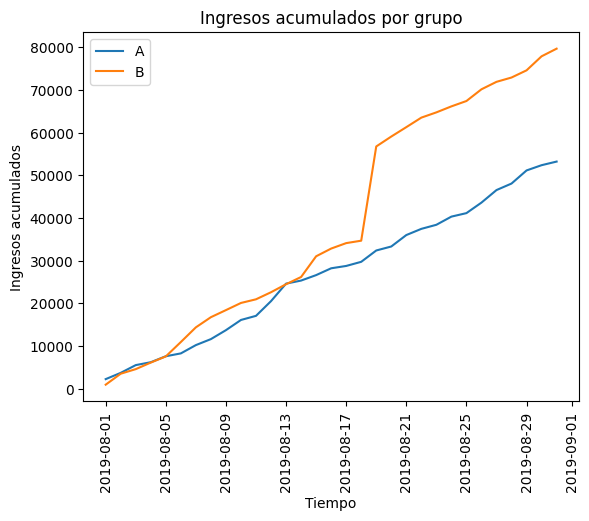

In [30]:
# Graficar ingresos acumulados por grupo
plt.plot(ventas_acumuladas_A['fecha'], ventas_acumuladas_A['total_ventas'], label='A')
plt.plot(ventas_acumuladas_B['fecha'], ventas_acumuladas_B['total_ventas'], label='B')
plt.legend()
plt.title('Ingresos acumulados por grupo')
plt.xlabel('Tiempo')
plt.ylabel('Ingresos acumulados')
plt.xticks(rotation=90)
plt.show()

**Observaciones:**

* Ambos grupos, A y B, comienzan con ingresos acumulados similares al inicio del periodo (1 de agosto de 2019).
* Grupo B muestra un rendimiento consistentemente superior a Grupo A en términos de ingresos acumulados.

* Alrededor del 17 de agosto de 2019, el Grupo B experimenta un aumento notable en los ingresos acumulados, creando una brecha significativa entre los dos grupos.

* Para el 31 de agosto de 2019, el Grupo B alcanza ingresos acumulados cercanos a los 80,000, mientras que el Grupo A se queda alrededor de los 60,000.

* Las estrategias o intervenciones aplicadas al Grupo B parecen ser más efectivas para aumentar los ingresos. Esto sugiere que la promoción, campaña de marketing, o cambios específicos implementados en este grupo tuvieron un impacto positivo significativo.

* El incremento drástico alrededor del 17 de agosto indica que hubo un evento o acción específica en esa fecha que impulsó las ventas en el Grupo B. Es importante investigar qué ocurrió en ese momento para entender qué causó ese aumento.

* Los ingresos acumulados de los Grupos A y B muestra que las mejoras en el Grupo B no solo fueron efectivas, sino que también se mantuvieron consistentes durante el tiempo. Esto puede sugerir una implementación continua o sostenida de estrategias exitosas.

* Es probable que el Grupo B se haya beneficiado de una promoción o descuento especial que no fue ofrecido al Grupo A. Esta promoción pudo haber comenzado alrededor del 17 de agosto, coincidiendo con el aumento significativo en los ingresos.

* El Grupo B podría haber implementado mejoras en la experiencia de usuario que facilitaron las compras, como una navegación mejorada en el sitio web, recomendaciones personalizadas de productos o una mayor eficiencia en el proceso de pago.

**2. Tamaño de pedido promedio acumulado por grupo**

In [31]:
# Calcular el tamaño de pedido promedio acumulado
fct_sales['tamaño_pedido_promedio'] = fct_sales['total_ventas'] / fct_sales['numero_facturas']

In [32]:
# Filtrar datos para cada grupo (A y B)
pedido_promedio_A = fct_sales.query('grupo == "A"')[['fecha', 'tamaño_pedido_promedio']]
pedido_promedio_B = fct_sales.query('grupo == "B"')[['fecha', 'tamaño_pedido_promedio']]

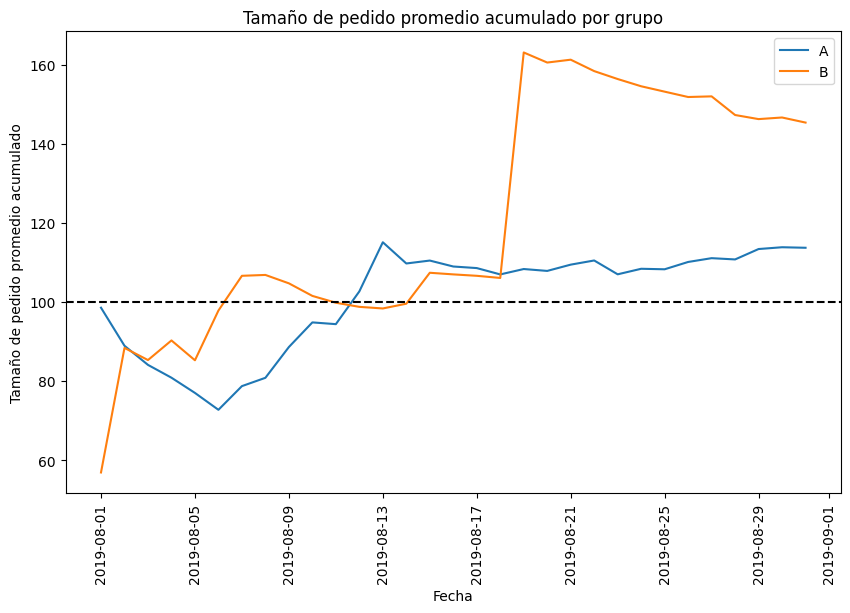

In [33]:
# Graficar tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(10, 6))
plt.plot(pedido_promedio_A['fecha'], pedido_promedio_A['tamaño_pedido_promedio'], label='A')
plt.plot(pedido_promedio_B['fecha'], pedido_promedio_B['tamaño_pedido_promedio'], label='B')
plt.legend()
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.xticks(rotation=90)
plt.axhline(y=100, color='black', linestyle='--')
plt.show()

* El Grupo B generalmente tiene un tamaño de pedido promedio acumulado más alto en comparación con el Grupo A.

* El tamaño de pedido promedio en el Grupo B muestra más fluctuaciones en comparación con el Grupo A.

* Las estrategias implementadas en el Grupo B parecen ser más efectivas para aumentar el tamaño del pedido promedio. Esto puede indicar que las promociones o campañas dirigidas a este grupo incentivaron a los clientes a realizar pedidos de mayor valor.

* Los clientes del Grupo B parecen estar realizando compras de mayor valor en comparación con los clientes del Grupo A. Esto sugiere una diferencia en el comportamiento de compra entre los dos grupos.

* El Grupo B pudo haber ofrecido promociones y descuentos que incentivaron a los clientes a agregar más productos a sus carritos, resultando en un tamaño de pedido promedio mayor.

* Es posible que el Grupo B haya sido segmentado para incluir a clientes con una mayor disposición a gastar, lo que explicaría el tamaño de pedido promedio más alto.

**3. Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A**

In [34]:
# Calcular el tamaño de pedido promedio acumulado
fct_sales['tamaño_pedido_promedio'] = fct_sales['total_ventas'] / fct_sales['numero_facturas']

In [35]:
# Filtrar datos para cada grupo (A y B)
pedido_promedio_A = fct_sales.query('grupo == "A"')[['fecha', 'tamaño_pedido_promedio']].set_index('fecha')
pedido_promedio_B = fct_sales.query('grupo == "B"')[['fecha', 'tamaño_pedido_promedio']].set_index('fecha')

In [36]:
# Calcular la diferencia relativa
diferencia_relativa = (pedido_promedio_B['tamaño_pedido_promedio'] / pedido_promedio_A['tamaño_pedido_promedio'] - 1) * 100

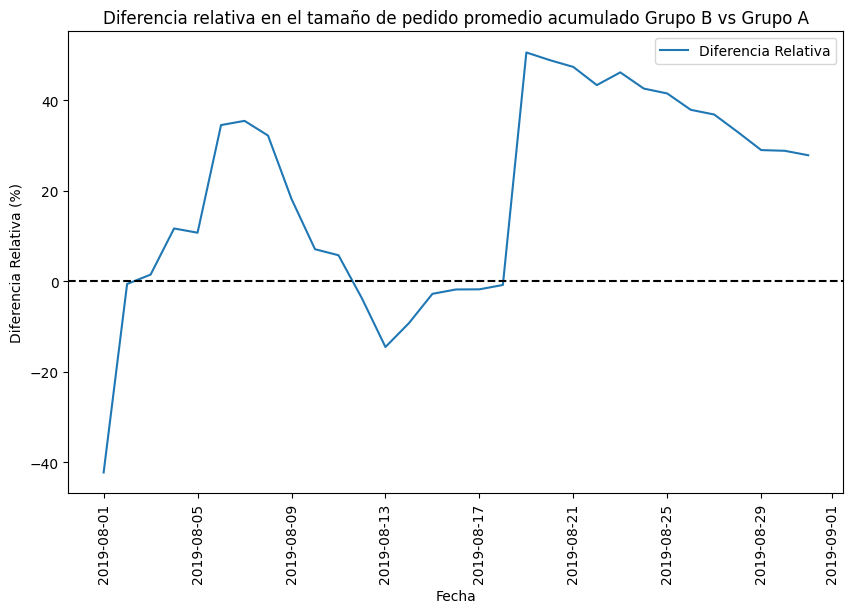

In [37]:
# Graficar la diferencia relativa
plt.figure(figsize=(10, 6))
plt.plot(diferencia_relativa.index, diferencia_relativa, label='Diferencia Relativa')
plt.legend()
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado Grupo B vs Grupo A')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa (%)')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

* Hay momentos en los que el Grupo B supera significativamente al Grupo A en el tamaño de pedido promedio, mientras que en otros momentos, la diferencia relativa disminuye.

* La variación en la diferencia relativa sugiere que las estrategias implementadas en el Grupo B tuvieron distintos niveles de éxito en diferentes periodos.

* Los picos en la diferencia relativa indican periodos en los que las promociones o campañas del Grupo B fueron particularmente efectivas, resultando en un tamaño de pedido promedio mayor. Los picos en la diferencia relativa podrían estar correlacionados con eventos específicos, como promociones especiales, lanzamientos de productos o descuentos temporales.

* Es posible que el Grupo B haya recibido ofertas segmentadas o descuentos por volumen, lo que podría haber incentivado a los clientes a realizar pedidos más grandes en ciertos periodos.

**4. Tasa de conversión de cada grupo y relación entre los pedidos y el número de visitas de cada día**

In [38]:
# Calcular la tasa de conversión diaria
fct_sales['tasa_conversion'] = fct_sales['numero_facturas'] / fct_sales['total_visitas']

In [39]:
# Filtrar datos para cada grupo (A y B)
conversion_A = fct_sales.query('grupo == "A"')[['fecha', 'tasa_conversion']]
conversion_B = fct_sales.query('grupo == "B"')[['fecha', 'tasa_conversion']]

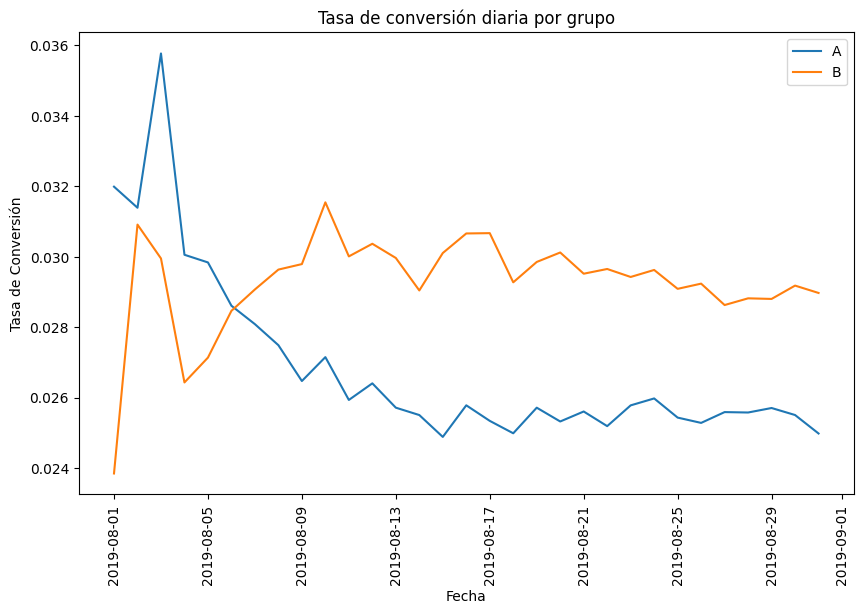

In [40]:
# Graficar tasas de conversión diarias por grupo
plt.figure(figsize=(10, 6))
plt.plot(conversion_A['fecha'], conversion_A['tasa_conversion'], label='A')
plt.plot(conversion_B['fecha'], conversion_B['tasa_conversion'], label='B')
plt.legend()
plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=90)
plt.show()

* El Grupo B generalmente muestra una tasa de conversión más alta que el Grupo A durante la mayor parte del período observado. También, se puede observar que ambos grupos experimentan fluctuaciones en sus tasas de conversión diaria, con el Grupo B mostrando variaciones más significativas.

* Las estrategias o campañas aplicadas al Grupo B parecen ser más efectivas para convertir visitas en pedidos, ya que su tasa de conversión es consistentemente más alta.

* Las fluctuaciones en las tasas de conversión sugieren que hay factores específicos que afectan el comportamiento de los usuarios en ambos grupos, como promociones temporales, cambios en la experiencia del usuario o variaciones en la demanda.

* Los picos en la tasa de conversión del Grupo B podrían estar correlacionados con promociones específicas o descuentos que incentivaron a los usuarios a completar sus compras.

* Es posible que el Grupo B haya implementado mejoras en la experiencia del usuario que hicieron que fuera más fácil y atractivo para los visitantes completar una compra.

* El Grupo B puede haber sido segmentado de manera más efectiva, dirigiendo las promociones y campañas a usuarios con una mayor probabilidad de conversión.

**5. Dispersión del número de pedidos por usuario**

In [41]:
# Calcular el número de pedidos por usuario
pedidos_por_usuario = ordenes.groupby(['visitorId', 'group'])['transactionId'].count().reset_index()

# Renombrar las columnas
pedidos_por_usuario.columns = ['usuario', 'grupo', 'numero_pedidos']

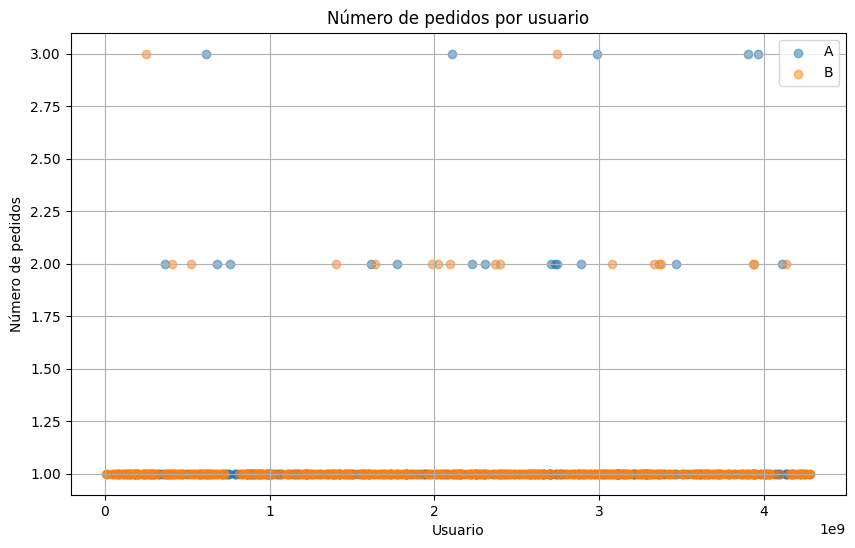

In [42]:
# Graficar el número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(pedidos_por_usuario.query('grupo == "A"')['usuario'], pedidos_por_usuario.query('grupo == "A"')['numero_pedidos'], alpha=0.5, label='A')
plt.scatter(pedidos_por_usuario.query('grupo == "B"')['usuario'], pedidos_por_usuario.query('grupo == "B"')['numero_pedidos'], alpha=0.5, label='B')
plt.legend()
plt.title('Número de pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

* La mayoría de los usuarios en ambos grupos han realizado entre 1 y 3 pedidos. Los puntos están concentrados en estos valores en el eje y.

* Tanto el Grupo A como el Grupo B muestran una distribución similar en términos del número de pedidos por usuario.

* Hay pocos usuarios que han realizado más de 2 pedidos, lo cual podría indicar un comportamiento de compra más leal o frecuente.

* La mayoría de los usuarios tienden a realizar solo uno o dos pedidos, lo que sugiere que la tienda tiene una alta rotación de clientes o que los clientes no están volviendo a comprar con frecuencia.

* Los pocos usuarios que han realizado 3 pedidos podrían ser considerados clientes leales. Estos usuarios podrían ser el foco de futuras estrategias de retención de clientes.

* Dado que la distribución de los pedidos por usuario es similar en ambos grupos, las estrategias aplicadas no parecen haber influido significativamente en la frecuencia de pedidos por usuario.

**6. Calcular los percentiles 95 y 99 del número de pedidos por usuario**

In [43]:
# Calcular el número de pedidos por usuario
pedidos_por_usuario = ordenes.groupby('visitorId')['transactionId'].count().reset_index()

# Renombrar las columnas
pedidos_por_usuario.columns = ['usuario', 'numero_pedidos']

In [44]:
# Calcular los percentiles 95 y 99
percentil_95 = pedidos_por_usuario['numero_pedidos'].quantile(0.95)
percentil_99 = pedidos_por_usuario['numero_pedidos'].quantile(0.99)

print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")

# Definir anomalías como puntos de datos por encima del percentil 99
anomalies = pedidos_por_usuario[pedidos_por_usuario['numero_pedidos'] > percentil_99]
print(f"Anomalías:\n {anomalies}")

Percentil 95: 1.0
Percentil 99: 2.0
Anomalías:
         usuario  numero_pedidos
55    249864742               3
138   611059232               3
478  2108163459               3
632  2742574263               3
687  2988190573               3
890  3908431265               3
908  3967698036               3


Observaciones:

* Percentil 95: El 95% de los usuarios han realizado 1 pedido o menos.

* Percentil 99: El 99% de los usuarios han realizado 2 pedidos o menos.

* Anomalías: Los usuarios que han realizado más de 2 pedidos se consideran anomalías. En este caso, hay 7 usuarios que han realizado 3 pedidos.

Dado lo anterior, se puede decir que la mayoría de los usuarios realizan solo 1 pedido, lo que sugiere que la tienda tiene una alta rotación de clientes o que los clientes no están volviendo a comprar con frecuencia. También los usuarios que han realizado 3 pedidos representan un pequeño porcentaje de la base de clientes, indicando un comportamiento de compra más leal o frecuente. Finalmente, los usuarios que realizan más de 2 pedidos son excepcionales y pueden considerarse clientes valiosos, ya que su comportamiento difiere significativamente del promedio.

**7. Dispersión de los precios de los pedidos**

In [45]:
# Extraer los datos de los precios de los pedidos
precios_pedidos = ordenes[['visitorId', 'revenue']]

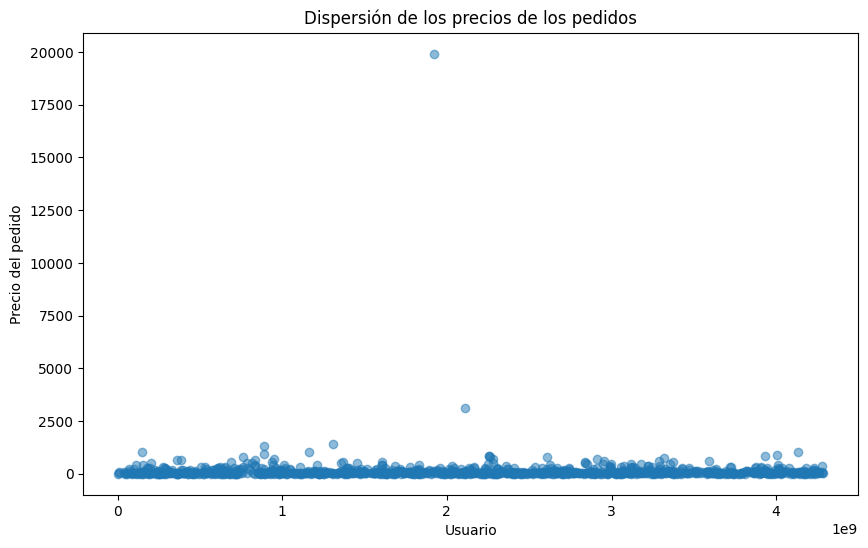

In [46]:
# Graficar el número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(precios_pedidos['visitorId'], precios_pedidos['revenue'], alpha=0.5)
plt.title('Dispersión de los precios de los pedidos')
plt.xlabel('Usuario')
plt.ylabel('Precio del pedido')
plt.show()

* La mayoría de los pedidos tienen precios bajos, lo que sugiere que los usuarios están comprando productos de menor costo o en menor cantidad.

* Hay algunos puntos de datos que se destacan significativamente, con precios de pedidos que alcanzan hasta 20,000. Estos representan pedidos excepcionales con precios mucho más altos que el promedio.

* La mayoría de los usuarios realizan pedidos que se mantienen en un rango de precios relativamente bajo, con una pequeña proporción de pedidos costosos.

* La tendencia general muestra que la mayoría de los pedidos tienen un precio moderado, lo que puede indicar que los productos más comprados son asequibles y de bajo costo.

* Los outliers con precios altos representan clientes que realizan compras significativamente mayores. Estos clientes pueden ser considerados de alto valor y podrían ser el objetivo de estrategias de marketing personalizadas.

* La dispersión de precios sugiere una diversidad en la cartera de productos, donde hay tanto productos de bajo costo como productos premium.

**8. Calcular los percentiles 95 y 99 de los precios de los pedidos**

In [47]:
# Extraer los datos de los precios de los pedidos
precios_pedidos = ordenes['revenue']

In [48]:
# Calcular los percentiles 95 y 99
percentil_95 = precios_pedidos.quantile(0.95)
percentil_99 = precios_pedidos.quantile(0.99)

print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")

# Definir anomalías como puntos de datos por encima del percentil 99
anomalies = ordenes[ordenes['revenue'] > percentil_99]
print(f"Anomalías:\n {anomalies}")

Percentil 95: 414.275
Percentil 99: 830.3
Anomalías:
       transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
743      3603576309  4133034833 2019-08-09   1050.0     A
744      3668308183   888512513 2019-08-27   1335.6     B
940      2420050534  4003628586 2019-08-08    905.8     B
949      1347999392   887908475 2019-08-21    930.0     A
1099      316924019   148427295 2019-08-12   1015.9     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1136      666610489  1307669133 2019-08-13   1425.8     A
1196     3936777065  2108080724 2019-08-15   3120.1     B


Observaciones:

* Percentil 95: El 95% de los pedidos tienen un precio igual o inferior a 414.275.

* Percentil 99: El 99% de los pedidos tienen un precio igual o inferior a 830.3.

* Anomalías: Los pedidos con precios superiores a 830.3 se consideran anomalías. En este caso, hay 9 pedidos que se destacan como anomalías.

Dado lo anterior, se puede decir que la mayoría de los pedidos tienen un precio moderado, lo que sugiere que los productos comprados son principalmente de bajo a mediano costo. También los pedidos que se destacan como anomalías representan una pequeña proporción de la base total, indicando que hay clientes que realizan compras significativamente mayores que el promedio. Identificar y entender estos pedidos de alto valor puede proporcionar información valiosa sobre los productos premium y las tácticas que mejor funcionan para atraer a estos clientes.

**9. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto**

In [49]:
# Crear variables con las órdenes por usuario de acuerdo al grupo
ordersA = ordenes[ordenes['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
# Renombrar las columnas 
ordersA.columns = ['userId', 'orders']

ordersB = ordenes[ordenes['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
# Renombrar las columnas 
ordersB.columns = ['userId', 'orders']

In [50]:
# Crear variables Sample para crear una serie con puntaje 0 si es que no tuvieron pedidos, necesario para la prueba U de Mann-Whitney
sampleA = pd.concat(
    [
        ordersA['orders'],
        pd.Series(0,
                  index=np.arange(visitas[visitas['group'] == 'A']['visits'].sum() - len(ordersA['orders'])),
                  name='orders')
    ],
    axis=0
)

sampleB = pd.concat(
    [
        ordersB['orders'],
        pd.Series(0,
                  index=np.arange(visitas[visitas['group'] == 'B']['visits'].sum() - len(ordersB['orders'])),
                  name='orders')
    ],
    axis=0
)

In [51]:
# Realizar la prueba U de Mann-Whitney
p_valor = stats.mannwhitneyu(sampleA, sampleB)[1]
ganancia_relativa_conversion = sampleB.mean() / sampleA.mean() - 1

print(f"P-valor: {p_valor:.3f}")
print(f"Ganancia relativa en la conversión: {ganancia_relativa_conversion:.3f}")

P-valor: 0.011
Ganancia relativa en la conversión: 0.160


* El valor p de 0.011 es significativamente menor que el umbral comúnmente utilizado de 0.05. Esto indica que la diferencia en la tasa de conversión entre los grupos A y B es estadísticamente significativa.

* La ganancia relativa en la conversión es del 16%, lo que significa que el grupo B tiene una tasa de conversión un 16% mayor que el grupo A.

* La diferencia significativa en la tasa de conversión sugiere que las estrategias implementadas para el grupo B, como promociones, descuentos o mejoras en la experiencia del usuario, son efectivas y resultan en una mayor conversión.

* Una ganancia relativa del 16% en la conversión es considerable y puede tener un impacto significativo en los ingresos totales. Esto muestra que incluso pequeños cambios en las estrategias pueden producir mejoras notables en el rendimiento.

**10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto**

In [52]:
# Realizar la prueba U de Mann-Whitney para comparar el tamaño promedio de pedido entre los grupos A y B
p_valor = stats.mannwhitneyu(ordenes[ordenes['group'] == 'A']['revenue'],
                             ordenes[ordenes['group'] == 'B']['revenue'])[1]

ganancia_relativa_tamaño_pedido = ordenes[ordenes['group'] == 'B']['revenue'].mean() / \
                                   ordenes[ordenes['group'] == 'A']['revenue'].mean() - 1

print(f"P-valor: {p_valor:.3f}")
print(f"Ganancia relativa en el tamaño promedio de pedidos: {ganancia_relativa_tamaño_pedido:.3f}")


P-valor: 0.862
Ganancia relativa en el tamaño promedio de pedidos: 0.278


* El p-valor de 0.862 es significativamente mayor que el umbral comúnmente utilizado de 0.05. Esto indica que no hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B.

* La ganancia relativa en el tamaño promedio de pedido es del 27.8%. Aunque esto puede parecer considerable, el alto p-valor sugiere que esta diferencia no es estadísticamente significativa.

* Dado el alto p-valor, no podemos concluir que las diferencias observadas en el tamaño promedio de pedido entre los grupos A y B sean significativas desde el punto de vista estadístico. Esto sugiere que las estrategias o condiciones aplicadas a los grupos no han tenido un impacto significativo en el tamaño del pedido.

* La diferencia en la ganancia relativa podría ser atribuida a la variabilidad aleatoria en los datos y no a un efecto real de las intervenciones o estrategias implementadas.

**11. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados**

In [53]:
# Filtrar las órdenes eliminando las anomalías basadas en el percentil 99 de los precios de los pedidos
percentil_99 = ordenes['revenue'].quantile(0.99)
ordenes_filtradas = ordenes[ordenes['revenue'] <= percentil_99]

In [54]:
# Crear variables con las órdenes por usuario de acuerdo al grupo para datos filtrados
ordersA_filtradas = ordenes_filtradas[ordenes_filtradas['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersA_filtradas.columns = ['userId', 'orders']

ordersB_filtradas = ordenes_filtradas[ordenes_filtradas['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersB_filtradas.columns = ['userId', 'orders']


In [55]:
# Crear variables Sample para crear una serie con puntaje 0 si es que no tuvieron pedidos, necesario para la prueba U de Mann-Whitney
sampleA_filtradas = pd.concat(
    [
        ordersA_filtradas['orders'],
        pd.Series(0,
                  index=np.arange(visitas[visitas['group'] == 'A']['visits'].sum() - len(ordersA_filtradas['orders'])),
                  name='orders')
    ],
    axis=0
)

sampleB_filtradas = pd.concat(
    [
        ordersB_filtradas['orders'],
        pd.Series(0,
                  index=np.arange(visitas[visitas['group'] == 'B']['visits'].sum() - len(ordersB_filtradas['orders'])),
                  name='orders')
    ],
    axis=0
)

In [56]:
# Realizar la prueba U de Mann-Whitney con datos filtrados
p_valor_filtradas = stats.mannwhitneyu(sampleA_filtradas, sampleB_filtradas)[1]
ganancia_relativa_conversion_filtradas = sampleB_filtradas.mean() / sampleA_filtradas.mean() - 1

print(f"P-valor (Datos Filtrados): {p_valor_filtradas:.3f}")
print(f"Ganancia relativa en la conversión (Datos Filtrados): {ganancia_relativa_conversion_filtradas:.3f}")

P-valor (Datos Filtrados): 0.010
Ganancia relativa en la conversión (Datos Filtrados): 0.164


* El valor p de 0.010 es significativamente menor que el umbral comúnmente utilizado de 0.05. Esto indica que la diferencia en la tasa de conversión entre los grupos A y B es estadísticamente significativa, incluso después de filtrar los datos.

* La ganancia relativa en la conversión es del 16.4%, lo que significa que el grupo B tiene una tasa de conversión un 16.4% mayor que el grupo A.

* La diferencia significativa en la tasa de conversión se mantiene incluso después de filtrar los datos, lo que refuerza la conclusión de que las estrategias implementadas para el grupo B son efectivas para aumentar la conversión.

* La ganancia relativa del 16.4% en la conversión sugiere un impacto sostenido de las intervenciones aplicadas al grupo B, lo que es considerablemente beneficioso para los ingresos y la efectividad global de las estrategias.

**12. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados**

In [57]:
# Filtrar las órdenes eliminando las anomalías basadas en el percentil 99 de los precios de los pedidos
percentil_99 = ordenes['revenue'].quantile(0.99)
ordenes_filtradas = ordenes[ordenes['revenue'] <= percentil_99]

# Realizar la prueba U de Mann-Whitney para comparar el tamaño promedio de pedido entre los grupos A y B con datos filtrados
p_valor_filtradas = stats.mannwhitneyu(ordenes_filtradas[ordenes_filtradas['group'] == 'A']['revenue'],
                                       ordenes_filtradas[ordenes_filtradas['group'] == 'B']['revenue'])[1]

ganancia_relativa_tamaño_pedido_filtradas = ordenes_filtradas[ordenes_filtradas['group'] == 'B']['revenue'].mean() / \
                                             ordenes_filtradas[ordenes_filtradas['group'] == 'A']['revenue'].mean() - 1

print(f"P-valor (Datos Filtrados): {p_valor_filtradas:.3f}")
print(f"Ganancia relativa en el tamaño promedio de pedidos (Datos Filtrados): {ganancia_relativa_tamaño_pedido_filtradas:.3f}")


P-valor (Datos Filtrados): 0.934
Ganancia relativa en el tamaño promedio de pedidos (Datos Filtrados): -0.031


* El p-valor de 0.934 es significativamente mayor que el umbral comúnmente utilizado de 0.05. Esto indica que no hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B, incluso después de filtrar los datos.

* La ganancia relativa en el tamaño promedio de pedido es de -3.1%, lo que significa que el grupo B tiene un tamaño promedio de pedido ligeramente menor que el grupo A.

* Dado el alto p-valor, no podemos concluir que las diferencias observadas en el tamaño promedio de pedido entre los grupos A y B sean significativas desde el punto de vista estadístico. Esto sugiere que las estrategias o condiciones aplicadas a los grupos no han tenido un impacto significativo en el tamaño del pedido, incluso después de filtrar las anomalías.

* Los resultados filtrados son consistentes con los datos brutos, lo que refuerza la conclusión de que no hay una diferencia significativa en el tamaño promedio de pedido entre los dos grupos.

**13. Toma una decisión basada en los resultados de la prueba**

Con base en los resultados obtenidos de los puntos anteriores, podemos tomar una decisión informada:

**Conversión (Punto 9 y Punto 11):**

* Datos en bruto: El grupo B mostró una ganancia relativa en la conversión del 16%, con un p-valor de 0.011, indicando una diferencia estadísticamente significativa.

* Datos filtrados: El grupo B mantuvo una ganancia relativa en la conversión del 16.4%, con un p-valor de 0.010, reforzando la significancia estadística de la diferencia en la tasa de conversión entre los grupos A y B.

**Tamaño promedio de pedido (Punto 10 y Punto 12):**

* Datos en bruto: No se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B (p-valor de 0.862). La ganancia relativa fue del 27.8%, pero no es estadísticamente significativa.

* Datos filtrados: De nuevo, no se encontró una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B (p-valor de 0.934). La ganancia relativa fue de -3.1%, lo que indica que el tamaño promedio de pedido del grupo B es ligeramente menor que el del grupo A, pero no es estadísticamente significativo.

Conclusiones:

* Conversión: La conversión es significativamente mayor en el grupo B, tanto con datos en bruto como con datos filtrados. Esto sugiere que las estrategias aplicadas al grupo B son efectivas para aumentar la tasa de conversión.

* Tamaño promedio de pedido: No hay evidencia suficiente para concluir que existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.

**Decisión recomendada:**

* Parar la prueba y considerar al grupo B como líder: Dado que el grupo B ha mostrado consistentemente una tasa de conversión significativamente mayor, se recomienda adoptar las estrategias implementadas en el grupo B como las más efectivas para mejorar la conversión. Aunque no haya una diferencia significativa en el tamaño promedio de pedido, el aumento en la tasa de conversión es un indicador positivo y valioso para el negocio.